In [2]:
from scipy.stats import norm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
p = 0.48
N = 32

X = np.random.binomial(1, p, N)

p_hat = X.mean() # Our estimate
se_hat = np.sqrt(p_hat * (1 - p_hat) / N) # The standard deviation of our estimate, aka standard error
std = X.std() # The standard deviation of the samples

print("Estimated proportion: %.3f" % p_hat)
print("Probability that we are within 0.01 of the true estimate: %.3f" % (norm.cdf(0.01/se_hat) - norm.cdf(-0.01/se_hat)))

print("Confidence interval: [%.3f, %.3f]" % (p_hat - 1.96*se_hat, p_hat + 1.96*se_hat))

Estimated proportion: 0.438
Probability that we are within 0.01 of the true estimate: 0.091
Confidence interval: [0.266, 0.609]


In [82]:
n_mc = 10000
n_inside = 0

for i_mc in range(n_mc):
    X = np.random.binomial(1, p, N)

    p_hat = X.mean() # Our estimate
    se_hat = np.sqrt(p_hat * (1 - p_hat) / N) # The standard deviation of our estimate, aka standard error

    p_is_inside = (p_hat - 1.96*se_hat <= p) & (p_hat + 1.96*se_hat >= p)
    n_inside += p_is_inside
    
n_inside / n_mc

0.9251

In [84]:
import random

n_boots = 5000

n_mc = 1000
n_inside = 0

for i_mc in range(n_mc):
    X = np.random.binomial(1, p, N)

    boot_means = np.reshape(random.choices(X, k=N*n_boots), (N, n_boots)).mean(axis=0)

    # search for the symmetric 95% confidence interval 

    idx_sorted_boot_means = np.argsort(boot_means)
    # print(boot_means[:20])
    a = boot_means[idx_sorted_boot_means[int((0.025 * n_boots))]]
    b = boot_means[idx_sorted_boot_means[int((0.975 * n_boots))]]
    # print(a, b)

    p_is_inside = (a <= p) & (b >= p)
    n_inside += p_is_inside

n_inside / n_mc

0.918

0.046


(0.47, 0.53)

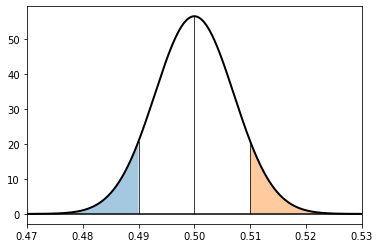

In [58]:
p = 0.49
N = 10000
sd_null = 0.5
p_null = 0.5

t = np.sqrt(N) * np.abs(p_null - p) / sd_null
print("%5.3f" % (1 - (norm.cdf(t) - norm.cdf(-t))))

fig, ax = plt.subplots()

sampdist = lambda u : 1/np.sqrt(2*np.pi*1/N*sd_null) * np.exp(-(u - p_null)**2 / (2 * 1/N*sd_null))
u_list = np.linspace(0, 1, 10000)
u_extreme_l = np.linspace(0, p_null - np.abs(p_null - p), 10000)
u_extreme_r = np.flip(1 - u_extreme_l)

ax.plot(u_list, sampdist(u_list), 'k', linewidth=2)
for pval in [p, 1 - p, p_null]:
    ax.vlines(pval, 0, sampdist(pval), 'k', linewidth=0.75)
ax.hlines(0, 0, 1, 'k')
ax.fill_between(u_extreme_l, sampdist(u_extreme_l), step="pre", alpha=0.4)
ax.fill_between(u_extreme_r, sampdist(u_extreme_r), step="pre", alpha=0.4)
ax.set_xlim(0.47, 0.53)
